## Analyzing Mobile Applications Project

### Objective

This project aims to analyze datasets from the Apple App Store and Google Play Store to gain insights into user preferences and boost revenue from in-app advertisements.

### Overview

The datasets provide comprehensive information about various apps available on these platforms, including app ratings, download numbers, prices, and other relevant details. By examining these datasets, we seek to understand the types of apps that are most popular among users, enabling us to optimize in-app advertising strategies.

### Data Source

The datasets for this analysis are sourced from Kaggle.com.

Datasets: [AppleStore](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps), [Google Playstore](https://www.kaggle.com/datasets/lava18/google-play-store-apps)


In [96]:
from csv import reader
import matplotlib.pyplot as plt
import squarify
import numpy as np
import pandas as pd
import plotly.express as px

In [3]:
# This method prints a chunk of dataset defined by the start and end parameter. The row_cols boolean is for printing number of rows and columns.
def explore_data(dataset,start,end,rows_cols = False):
    print("Printing Dataset \n")
    data_slice = dataset[start:end]

    for row in data_slice:
        print(row)
        print("\n")
        
    if rows_cols:
        print("Number of rows:", len(dataset))
        print("Number of columns",len(dataset[0]),"\n")

In [4]:
# Returns a file as a list of list.
def readfile(path):
    handler = open(path)
    file = reader(handler)
    return list(file)

In [5]:
# The paths is local directory on my pc
apple_store = readfile("Datasets/AppleStore.csv") 
google_playstore = readfile("Datasets/googleplaystore.csv")

In [6]:
# This row has incorrect values
del google_playstore[10473]

### Checking for duplicates in datasets.

The method is designed to check for duplicate values in both the Apple App Store and Google Play Store datasets. It performs the following tasks:

1. **Identify Duplicates**: The method scans the datasets to identify any duplicate apps.
2. **Print Duplicate Information**: It prints the total number of duplicate apps found and provides the names of a few duplicate apps as a reference.

Duplicate values will be removed later based on a specified criterion to ensure each app is unique in the datasets.


In [8]:
def checkDuplicate(dataset):
    unique_items = []
    duplicate_items = []
    for item in dataset:
        if item[0] in unique_items:
            duplicate_items.append(item[0])
        else:
            unique_items.append(item[0])

    print("No of duplicate apps:", len(duplicate_items))
    print("Duplicate Items are: ",duplicate_items[0:5])
    return duplicate_items

### Function Descriptions

1. **`findDuplicates(dataset):`**

    This function takes a dataset as an argument and identifies duplicate entries. It returns a dictionary that includes either unique values or the duplicate entry with the maximum number of reviews. This ensures that only the most relevant or popular duplicate app is retained.

2. **`removeDuplicates(dataset):`**

    This method retains only the values returned by the `findDuplicates` function and deletes all other values. It returns the cleaned dataset, free from duplicates, ensuring the integrity and accuracy of the data for further analysis.

In [10]:
def findDuplicates(dataset):
    reviews_max = {}

    for item in dataset[1:]:
        name = item[0]
        no_ratings = float(item[3])
        if name not in reviews_max:
            reviews_max[name] = no_ratings
        else:
            if no_ratings > reviews_max[name]:
                reviews_max[name] = no_ratings
    print(len(reviews_max))

    return reviews_max

In [11]:
def removeDuplicates(dataset):
    duplicates = findDuplicates(dataset)

    already_added = []
    android_clean = []
    for item in dataset[1:]:
        name = item[0]
        no_ratings = float(item[3])

        if (name not in already_added) and (no_ratings == duplicates[name]):
            android_clean.append(item)
            already_added.append(name)

    return android_clean

In [12]:
# By running findDuplicates I found that only google_playstore has duplicates values.
google_playstore = removeDuplicates(google_playstore)

9659


### Function Descriptions

1. **`isEnglish(str):`**

    This function checks if a given string is in English. It does so by counting the number of non-English characters in the string. This method is used later to filter out non-English apps from the dataset, as we will only process English-language apps.

2. **`filterEnglishApps(dataset, name_col_index):`**

    This method filters and returns all English-language apps from the dataset using the `isEnglish` method. The `name_col_index` parameter specifies the column index in the dataset to which the filter should be applied. By using this method, we ensure that only apps with English names are included in our analysis.

3. **`filterFreeApps(dataset, price_col_index):`**

    This method filters and returns only the free apps from the dataset. It takes the column index of the price as an argument (`price_col_index`) and includes only those apps where the price is equal to 0. This allows us to focus our analysis on apps that are free to download and use.

In [14]:
def isEnglish(str):
    counter = 0
    for char in str:
        if ord(char) > 127:
            counter += 1 
            
            
    return False if counter > 3 else True

In [15]:
def filterEnglishApps(dataset,name_col_index):
    english_apps = []
    english_apps.append(dataset[0])
    for item in dataset[1:]:
        if isEnglish(item[name_col_index]):
            english_apps.append(item)

    return english_apps

In [16]:
def filterFreeApps(dataset,price_col_index):
    free_apps = []
    free_apps.append(dataset[0])
    for item in dataset[1:]:
        price = item[price_col_index]
        if price == "0.0" or price == "0":
            free_apps.append(item)          

    return free_apps

In [17]:
# Taking only English apps for our analysis
google_playstore = filterEnglishApps(google_playstore,0)
apple_store = filterEnglishApps(apple_store,2)


In [18]:
# Taking only free English apps for our analysis
google_playstore = filterFreeApps(google_playstore,7)
apple_store = filterFreeApps(apple_store,4)

### Function Descriptions

1. **`freq_table(dataset, col_index):`**

    This function generates a frequency table for a specified column in the dataset. It creates a dictionary where each key is a unique value from the column, and each value is the percentage of occurrences of that unique value in the column. The percentages are calculated relative to the total number of entries in the column.

2. **`display_table(dataset, index):`**

    This function displays the frequency table for a specified column in the dataset. It first generates the frequency table using the `freq_table` function, then sorts the entries in descending order of frequency. Finally, it prints each unique value and its corresponding percentage.

In [20]:
def freq_table(dataset,col_index):
    freq_table = {}
    for item in dataset[1:]:
        data = item[col_index]
        if data in freq_table:
            freq_table[data] += 1
        else:
            freq_table[data] = 1

    for item in freq_table:
        freq_table[item] /= (len(dataset) - 1)
        freq_table[item] *= 100
    return freq_table 

In [21]:
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

### Function Descriptions

**`mostPopularGenreGoogle(dataset, unique_genres):`**

This method calculates and prints the most popular genres in the Google Play Store dataset based on the average number of installs. It processes the dataset by summing and averaging the installs for each genre (after cleaning the install values), and then sorts and prints the genres by average installs in descending order. This helps identify which genres have the highest user engagement.

**`mostPopularGenreApple(dataset, unique_genres):`**

This method calculates and prints the most popular genres in the Apple App Store dataset based on the average number of user ratings. Unlike the Google Play Store dataset, which has an installs column, the Apple dataset does not. Therefore, it calculates the average number of ratings for each genre. The method initializes a dictionary to store these averages, sorts them, and prints the genres in descending order of average ratings, highlighting those with the highest user engagement.

In [164]:
import plotly.io as pio
import pandas as pd

def horizontal_bar_chart(data, title, file_path):
    """
    Creates a horizontal bar chart with a list of tuples as input and saves it as an image file.
    Each tuple contains a value and a genre name.
    
    :param data: List of tuples [(value, genre_name), ...]
    :param title: Title of the chart
    :param file_path: File path to save the chart image
    :return: Plotly figure object
    """
    # Round values to two decimal places
    rounded_data = [(round(value, 2), genre) for value, genre in data]
    
    # Prepare data for Plotly
    df = pd.DataFrame(rounded_data, columns=['Value', 'Genre'])
    
    # Create the horizontal bar chart
    fig = px.bar(df, y='Genre', x='Value', orientation='h',
                 color='Genre',  # Color bars by genre
                 title=f'Horizontal Bar Chart of Genres for {title}',
                 labels={'Value': 'Size'},
                 text='Value',
                 template='plotly_white')
    
    # Update layout for better appearance
    fig.update_layout(title={'x':0.5},
                      xaxis_title='Size',
                      yaxis_title='Genre',
                      xaxis=dict(tickvals=df['Value'], ticktext=[f'{v}' for v in df['Value']]),
                      height=1200,  # Increased height
                      width=1200)   # Increased width
    
    # Save the figure as an image file
    pio.write_image(fig, file_path,format='png')
    
    return fig



In [170]:
def create_treemap(data, title, file_path):
    """
    Creates a treemap from a list of tuples where each tuple contains a value and a genre name
    and saves it as an image file.
    
    :param data: List of tuples [(value, genre_name), ...]
    :param title: Title of the chart
    :param file_path: File path to save the chart image
    """
    # Round values to two decimal places
    rounded_data = [(round(value, 2), genre) for value, genre in data]
    
    # Unpack the data into values and labels
    values, labels = zip(*rounded_data)
    
    # Define a colormap
    cmap = plt.get_cmap('tab20')  # 'tab20' provides up to 20 distinct colors
    
    # Generate colors for each genre
    colors = [cmap(i / len(labels)) for i in range(len(labels))]
    
    # Create the figure and axis
    plt.figure(figsize=(15, 15))
    
    # Create the treemap
    squarify.plot(sizes=values, label=labels, alpha=0.7, color=colors)
    
    # Add title and display the plot
    plt.title('Treemap of {} Genres'.format(title))
    plt.axis('off')  # Hide the axes
    
    # Save the figure
    plt.savefig(file_path)
    
    plt.show()

In [24]:

def mostPopularGenreApple(dataset,unique_genres):
    dict = {}
    for key in unique_genres:
        total = 0
        len_genre = 0
        for row in dataset[1:]:
            genre = row[-5]
            if key == genre:
                total += float(row[5])
                len_genre += 1
        avg = total / len_genre
        dict[key] = avg

    table_display = []
    for key in dict:
        key_val_as_tuple = (dict[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])
    return table_sorted
        
        

In [25]:

def mostPopularGenreGoogle(dataset,unique_genres):
    dict = {}
    for key in unique_genres:
        total = 0
        len_genre = 0
        for row in dataset[1:]:
            genre = row[1]
            if key == genre:
                installs = row[5]
                if installs.__contains__(','):
                    installs = installs.replace(',',"")
                installs = installs.replace("+","")
                total += float(installs)
                len_genre += 1
        avg = total / len_genre
        dict[key] = avg

    table_display = []
    for key in dict:
        key_val_as_tuple = (dict[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
   
    for entry in table_sorted:
        print(entry[1], ':', entry[0])
    return table_sorted
        
        

In [26]:
#Finding and printing most popular genre for both datasets.
apple_popular_genre = mostPopularGenreApple(apple_store,freq_table(apple_store,11))
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
google_popular_genre = mostPopularGenreGoogle(google_playstore,freq_table(google_playstore,1))

Reference : 67447.9
Music : 56482.02985074627
Social Networking : 53078.195804195806
Weather : 47220.93548387097
Photo & Video : 27249.892215568863
Navigation : 25972.05
Travel : 20216.01785714286
Food & Drink : 20179.093023255813
Sports : 20128.974683544304
Health & Fitness : 19952.315789473683
Productivity : 19053.887096774193
Games : 18924.68896765618
Shopping : 18746.677685950413
News : 15892.724137931034
Utilities : 14010.100917431193
Finance : 13522.261904761905
Entertainment : 10822.961077844311
Lifestyle : 8978.308510638299
Book : 8498.333333333334
Business : 6367.8
Education : 6266.333333333333
Catalogs : 1779.5555555555557
Medical : 459.75
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
COMMUNICATION : 38456119.167247385
VIDEO_PLAYERS : 24727872.452830188
SOCIAL : 23253652.127118643
PHOTOGRAPHY : 17840110.40229885
PRODUCTIVITY : 16787331.344927534
GAME : 15588015.603248259
TRAVEL_AND_LOCAL : 13984077.710144928
ENTERTAINMENT : 11640705.88235294
TOOLS : 10801391.298666667
NEWS_AND_MAGAZ

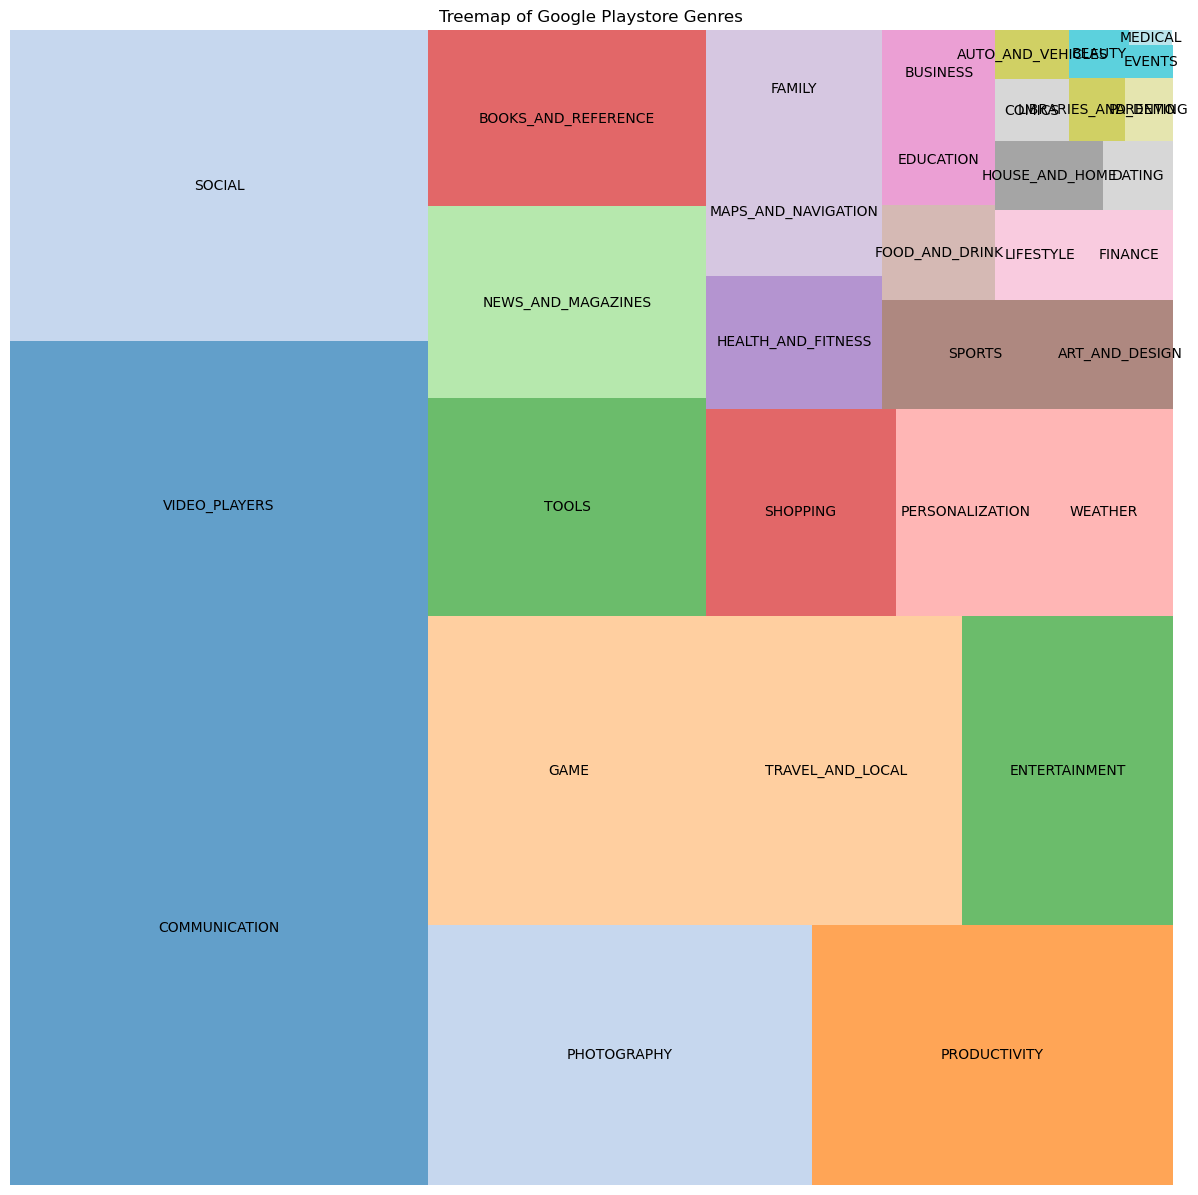

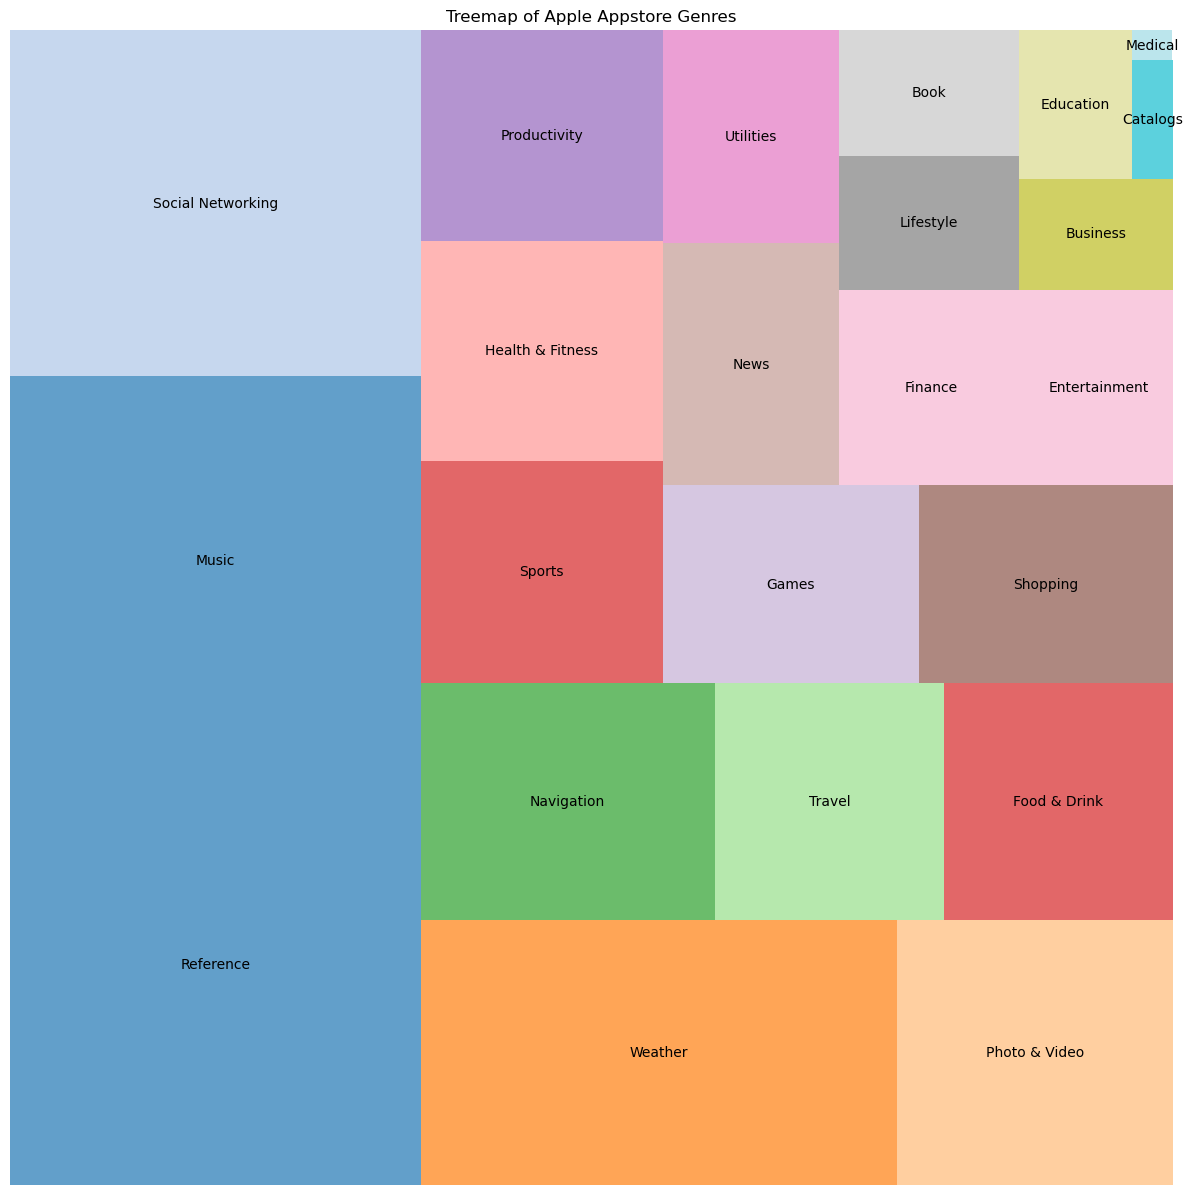

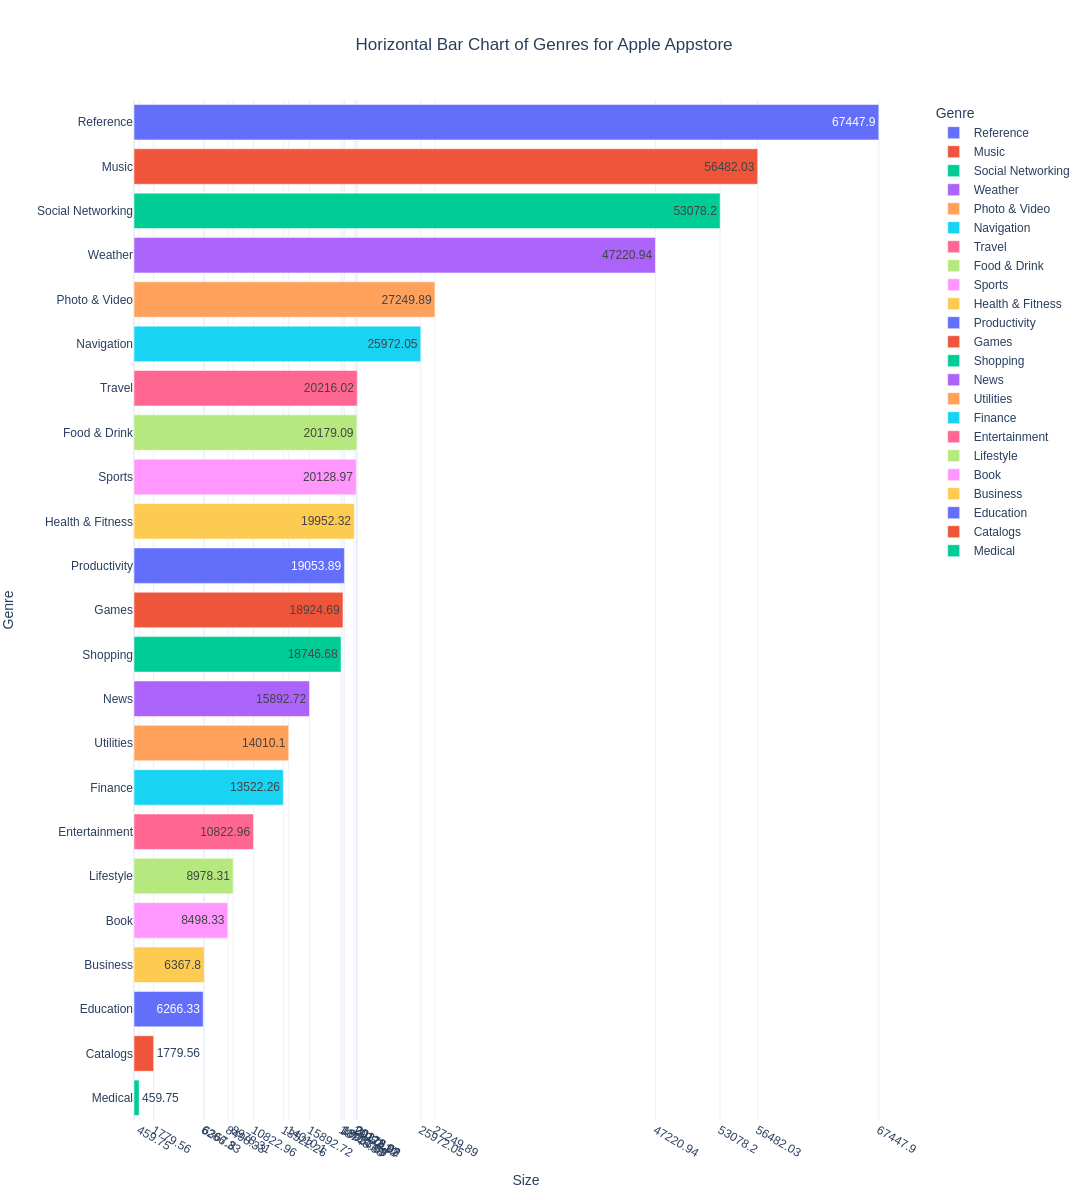

In [172]:
create_treemap(google_popular_genre,"Google Playstore","/home/saadahmad/Desktop/Appstore_treemap") 
create_treemap(apple_popular_genre,"Apple Appstore","/home/saadahmad/Desktop/Playstore_treemap")
horizontal_bar_chart(google_popular_genre,"Google Playstore","/home/saadahmad/Desktop/Appstore_Barchart")
horizontal_bar_chart(apple_popular_genre,"Apple Appstore","/home/saadahmad/Desktop/Playstore_Barchart")